In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from collections import defaultdict

In [3]:
data=pd.read_csv('Physical experiments.csv',sep=';',decimal=',')
data.head()

,X Axis,Y Axis,Z Axis,speed,std speed,flashes,height,flash time,number of flashes,time,direction
0,0,0,0,7.732100,21.274118,0.836535,0.893909,37.500000,12.0,19.409393,V
1,0,1,0,8.932976,24.143920,0.997567,0.981108,41.788991,327.0,19.996960,U
2,0,2,0,1.420914,25.140560,0.992085,0.964874,42.411458,576.0,20.025626,U
3,0,3,0,-7.024316,23.485237,0.989346,0.951449,44.366412,655.0,19.951152,U
4,0,4,0,-14.055115,25.169176,0.987477,0.930151,46.108021,935.0,19.967825,U


In [49]:
data.tail()

,X Axis,Y Axis,Z Axis,speed,std speed,flashes,height,flash time,number of flashes,time,direction
219,10,29,0,31.425366,15.827555,0.774333,0.748291,46.666667,9.0,18.241143,U
220,10,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
221,10,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,10,32,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
223,10,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U


In [50]:
data.isnull().sum()

X Axis                0
Y Axis                0
Z Axis                0
speed                21
std speed            29
flashes              21
height               21
flash time           21
number of flashes     8
time                 21
direction             2
dtype: int64

In [51]:
data.isnull().sum()

X Axis                0
Y Axis                0
Z Axis                0
speed                21
std speed            29
flashes              21
height               21
flash time           21
number of flashes     8
time                 21
direction             2
dtype: int64

In [52]:

data.fillna(0, inplace=True)

In [53]:
data.isnull().sum()

X Axis               0
Y Axis               0
Z Axis               0
speed                0
std speed            0
flashes              0
height               0
flash time           0
number of flashes    0
time                 0
direction            0
dtype: int64

In [54]:
data.tail(221)

,X Axis,Y Axis,Z Axis,speed,std speed,flashes,height,flash time,number of flashes,time,direction
3,0,3,0,-7.024316,23.485237,0.989346,0.951449,44.366412,655.0,19.951152,U
4,0,4,0,-14.055115,25.169176,0.987477,0.930151,46.108021,935.0,19.967825,U
5,0,5,0,-19.212398,22.381823,0.978280,0.879482,47.056446,1435.0,19.974903,V
6,0,6,0,-23.477992,22.069179,0.976242,0.846782,50.034258,1839.0,20.043292,V
7,0,7,0,-29.054831,20.130858,0.975135,0.833091,53.111776,2174.0,19.997991,U
...,...,...,...,...,...,...,...,...,...,...,...
219,10,29,0,31.425366,15.827555,0.774333,0.748291,46.666667,9.0,18.241143,U
220,10,30,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,U
221,10,31,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
222,10,32,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,U


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X Axis             224 non-null    int64  
 1   Y Axis             224 non-null    int64  
 2   Z Axis             224 non-null    int64  
 3   speed              224 non-null    float64
 4   std speed          224 non-null    float64
 5   flashes            224 non-null    float64
 6   height             224 non-null    float64
 7   flash time         224 non-null    float64
 8   number of flashes  224 non-null    float64
 9   time               224 non-null    float64
 10  direction          224 non-null    object 
dtypes: float64(7), int64(3), object(1)
memory usage: 19.4+ KB


In [56]:
data.nunique()

X Axis                11
Y Axis                34
Z Axis                 2
speed                204
std speed            196
flashes              204
height               203
flash time           195
number of flashes    178
time                 196
direction              3
dtype: int64

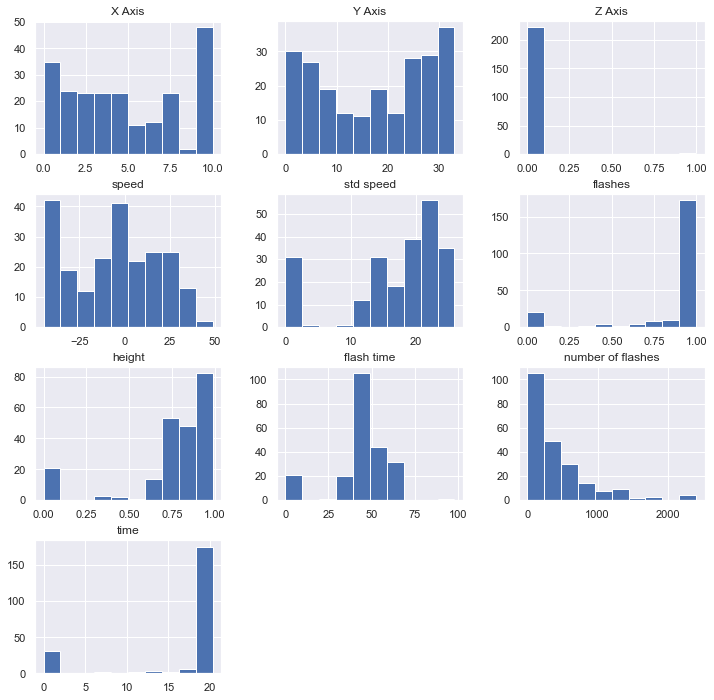

In [57]:
cols=['X Axis','Y Axis','Z Axis','speed','std speed','flashes','height','flash time','number of flashes','time']
data[cols].hist(figsize=(12,12))
plt.show()

In [58]:
def hist_box(col):
    f,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(8,8))
    sns.set(style='darkgrid')
    sns.boxplot(data[col],ax=ax_box,showmeans=True)
    sns.histplot(data[col],ax=ax_hist)
    ax_hist.axvline(data[col].mean(),color='yellow',linestyle='--')
    ax_hist.axvline(data[col].median(),color='red',linestyle='-')
    plt.show()

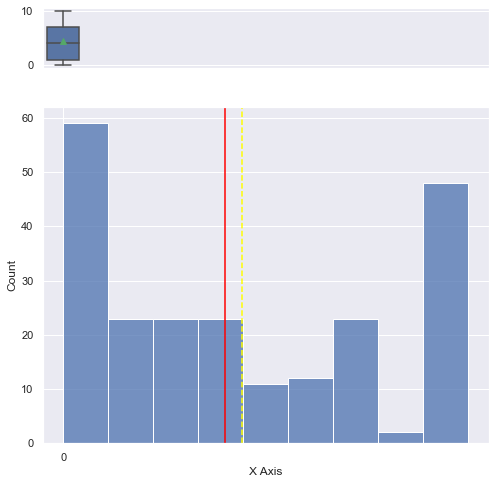

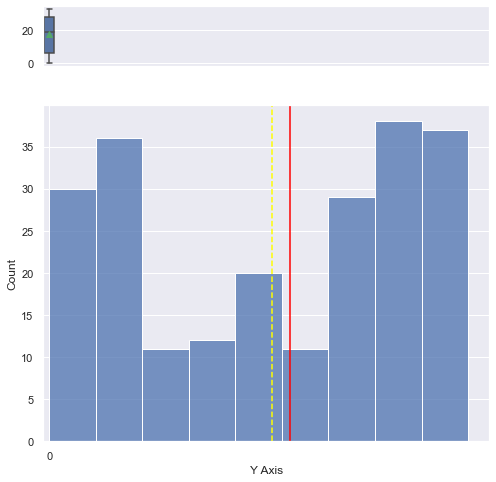

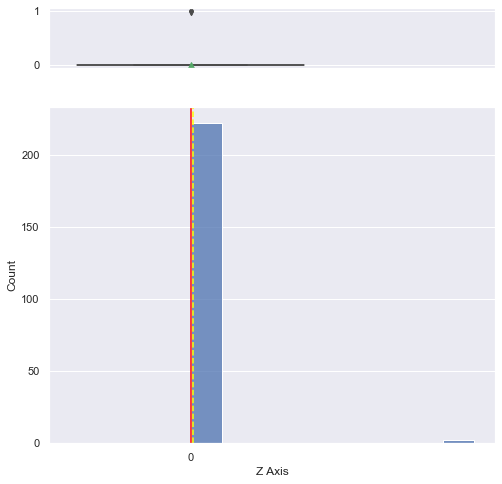

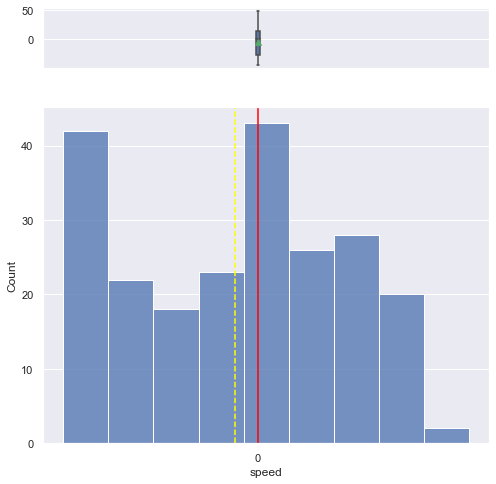

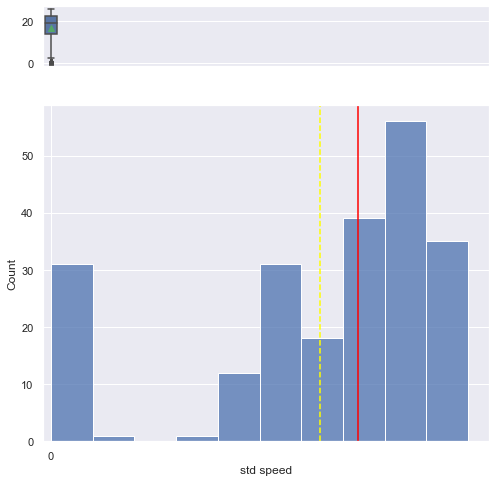

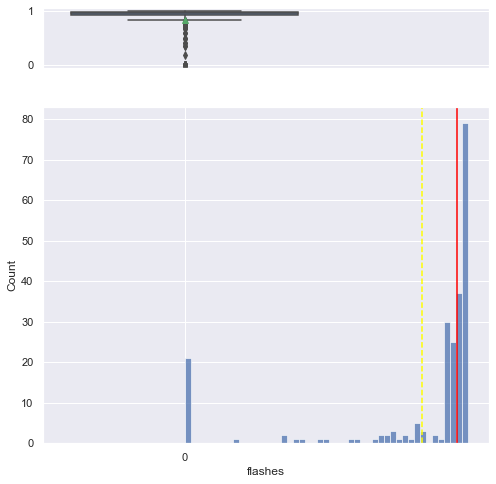

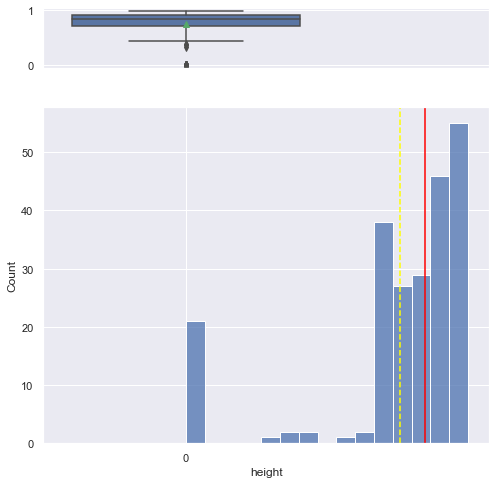

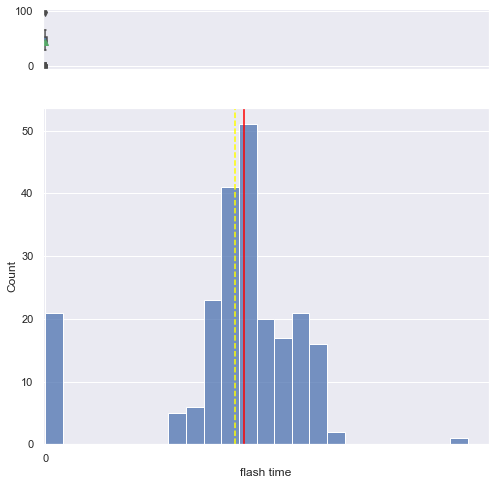

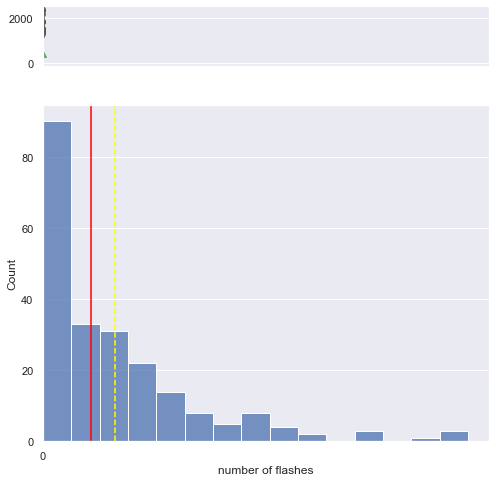

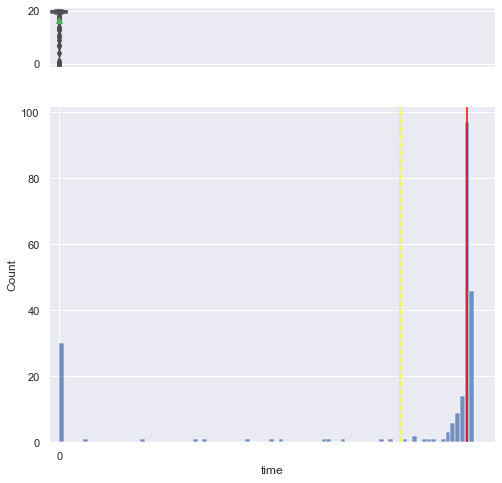

In [59]:
for i in cols:
    hist_box(i)

In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X Axis,224.0,4.419643,3.416232,0.000000,1.000000,4.000000,7.000000,10.000000
Y Axis,224.0,17.566964,10.833223,0.000000,6.000000,19.000000,28.000000,33.000000
Z Axis,224.0,0.008929,0.094279,0.000000,0.000000,0.000000,0.000000,1.000000
speed,224.0,-5.234035,24.358563,-44.875098,-27.541258,0.000000,13.823448,48.700734
std speed,224.0,16.709234,7.686950,0.000000,13.977867,19.014739,22.441334,25.867910
flashes,224.0,0.836078,0.295707,0.000000,0.919802,0.959639,0.985269,0.998928
height,224.0,0.750928,0.268590,0.000000,0.709292,0.835141,0.916955,0.987410
flash time,224.0,44.014644,16.515671,0.000000,40.853785,46.183035,53.337508,98.000000
number of flashes,224.0,406.245536,476.000959,0.000000,53.000000,268.500000,554.250000,2401.000000
time,224.0,16.672879,7.013523,0.000000,19.320301,19.948571,20.034362,20.300176


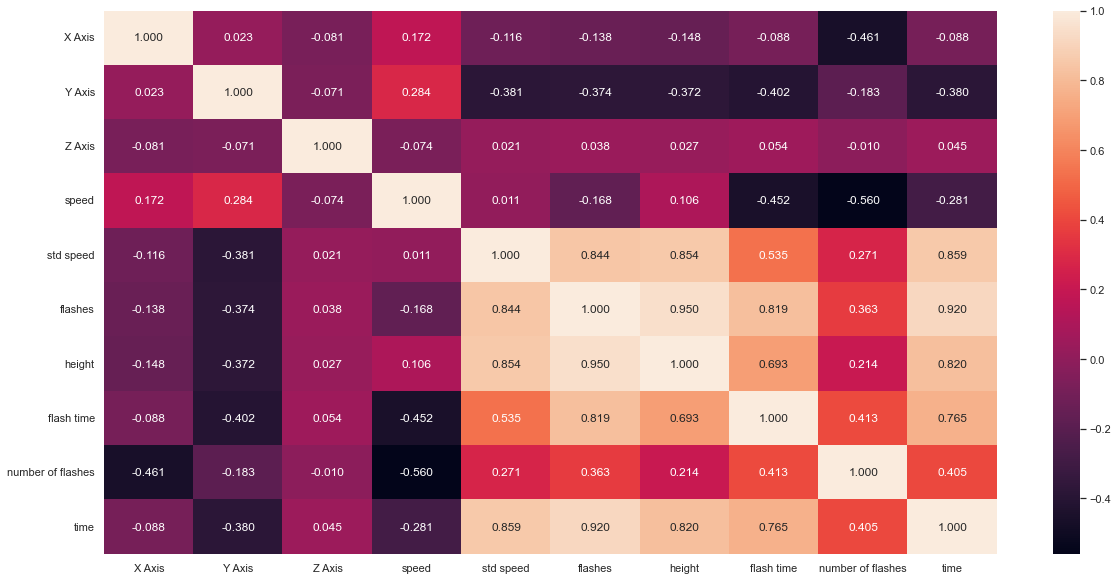

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,fmt='.3f')
plt.show()

In [62]:
data['direction'].nunique()

3

In [63]:
data['height'].nunique()

203

In [64]:
data=data.sample(frac=1)
x=data.drop(['speed'],axis=1)
y=data[['speed']]

In [65]:
x['direction']=x['direction'].astype(object)

In [66]:
x['direction'].nunique()

3

In [67]:
data['direction']

195    U
80     U
187    U
142    U
69     U
      ..
155    U
49     U
95     V
26     U
123    V
Name: direction, Length: 224, dtype: object

In [68]:
y.head()

,speed
195,48.700734
80,0.000000
187,-29.638707
142,-4.734182
69,-42.686424


In [69]:
y.shape

(224, 1)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [71]:
y_train.shape

(156, 1)

In [72]:
model = LGBMRegressor()

In [ ]:
from sklearn import preprocessing 
lbl = preprocessing.LabelEncoder() 
x_train['direction'] = lbl.fit_transform(x_train['direction'].astype(str))
x_test['direction'] = lbl.fit_transform(x_test['direction'].astype(str))

In [29]:
model.fit(x_train,y_train)

LGBMRegressor()

In [30]:
y_pred=model.predict(x_test)

In [43]:
print('R2 Score:',r2_score(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))

R2 Score: 0.8850830397049312
mean squared error: 55.36532458207173


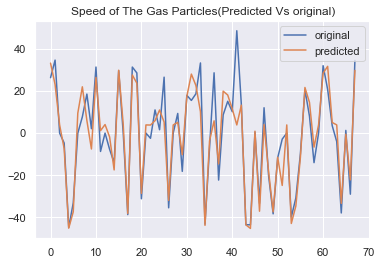

In [36]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Speed of The Gas Particles(Predicted Vs original)")
plt.legend()
plt.show()